In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Training_Data_Set.csv')

In [3]:
df.shape

(53515, 17)

In [4]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count              7534
seat_count              8511
fuel_type                  0
Price                      0
dtype: int64

In [5]:
df.drop(columns='body_type',inplace=True)

In [6]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance               1211
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power           1439
Vroom Audit Rating        0
transmission              0
door_count             7534
seat_count             8511
fuel_type                 0
Price                     0
dtype: int64

In [7]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)

In [8]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [9]:
df['door_count'].fillna(df['door_count'].mode()[0],inplace=True)

In [10]:
df['seat_count'].fillna(df['seat_count'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

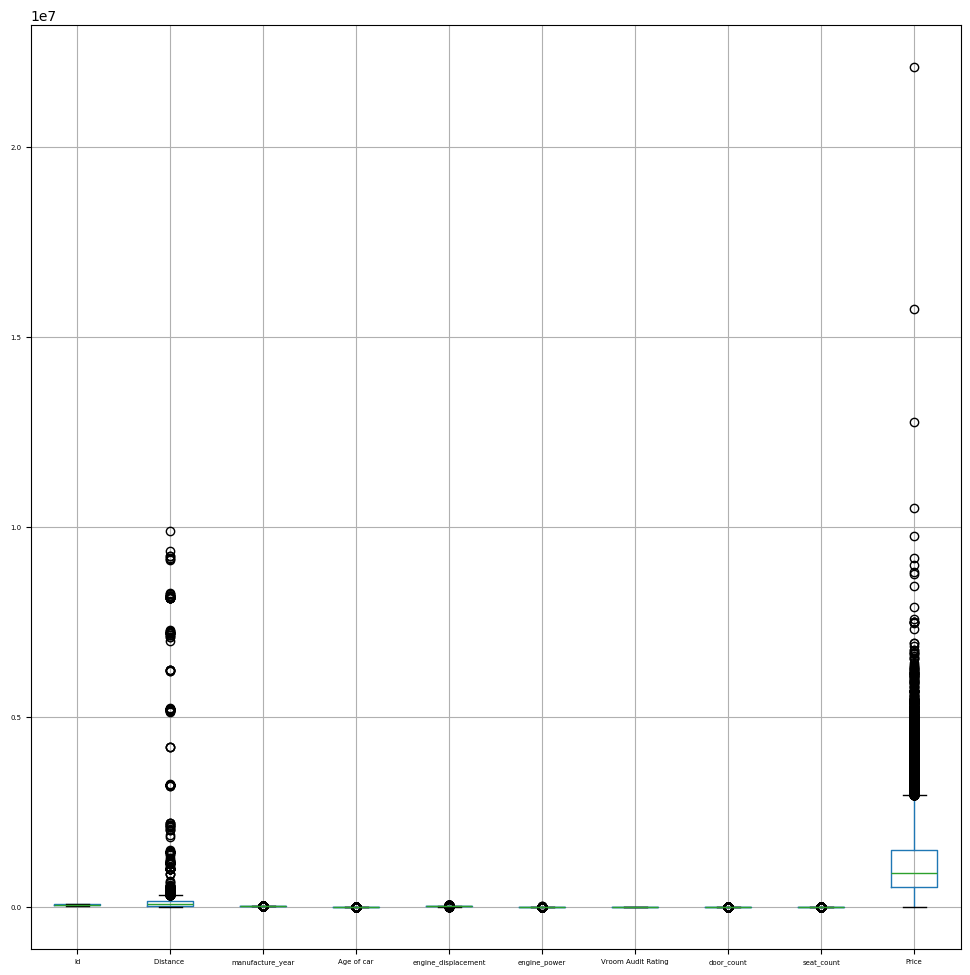

In [12]:
df.boxplot(figsize=(12,12),fontsize=5)
plt.show()

In [13]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(exclude='object')

In [14]:
df_num.dtypes

Id                       int64
Distance               float64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
door_count             float64
seat_count             float64
Price                  float64
dtype: object

In [15]:
df_num=df_num.astype(int)

In [16]:
df_num.dtypes

Id                     int32
Distance               int32
manufacture_year       int32
Age of car             int32
engine_displacement    int32
engine_power           int32
Vroom Audit Rating     int32
door_count             int32
seat_count             int32
Price                  int32
dtype: object

In [17]:
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df_cat['Location']=le.fit_transform(df_cat['Location'])

In [20]:
df_cat['Maker']=le.fit_transform(df_cat['Maker'])
df_cat['Owner Type']=le.fit_transform(df_cat['Owner Type'])
df_cat['fuel_type']=le.fit_transform(df_cat['fuel_type'])
df_cat['model']=le.fit_transform(df_cat['model'])
df_cat['transmission']=le.fit_transform(df_cat['transmission'])

In [21]:
df_cat.dtypes

Maker           int32
model           int32
Location        int32
Owner Type      int32
transmission    int32
fuel_type       int32
dtype: object

In [22]:
df_num.dtypes

Id                     int32
Distance               int32
manufacture_year       int32
Age of car             int32
engine_displacement    int32
engine_power           int32
Vroom Audit Rating     int32
door_count             int32
seat_count             int32
Price                  int32
dtype: object

In [23]:
df=pd.concat([df_cat,df_num],axis=1)

In [24]:
df.sample(10)

,Maker,model,Location,Owner Type,transmission,fuel_type,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price
18072,6,8,6,3,1,0,43073,167479,2006,13,2000,103,4,4,5,360843
1994,6,8,6,1,0,0,26995,241948,2005,14,1896,77,6,4,5,333936
809,6,8,1,3,1,1,25810,65520,1999,20,1595,74,4,4,5,191524
37989,6,8,9,0,0,1,62990,65520,2008,11,2000,103,5,4,5,499352
11485,7,2,3,3,1,1,36486,23500,2013,6,998,50,4,4,4,372030
9674,6,8,5,0,1,1,34675,50,2015,4,1395,110,5,4,5,1377904
40873,6,22,6,0,1,1,65874,1,2015,4,1197,81,5,4,5,994011
31273,0,11,5,3,1,0,56274,3751,2015,4,1968,110,7,4,5,2833079
38757,7,21,6,3,1,1,63758,16,2015,4,998,51,4,5,5,754719
29527,7,0,4,1,1,1,54528,10,2015,4,1197,91,5,4,5,1214550


In [25]:
df.dtypes

Maker                  int32
model                  int32
Location               int32
Owner Type             int32
transmission           int32
fuel_type              int32
Id                     int32
Distance               int32
manufacture_year       int32
Age of car             int32
engine_displacement    int32
engine_power           int32
Vroom Audit Rating     int32
door_count             int32
seat_count             int32
Price                  int32
dtype: object

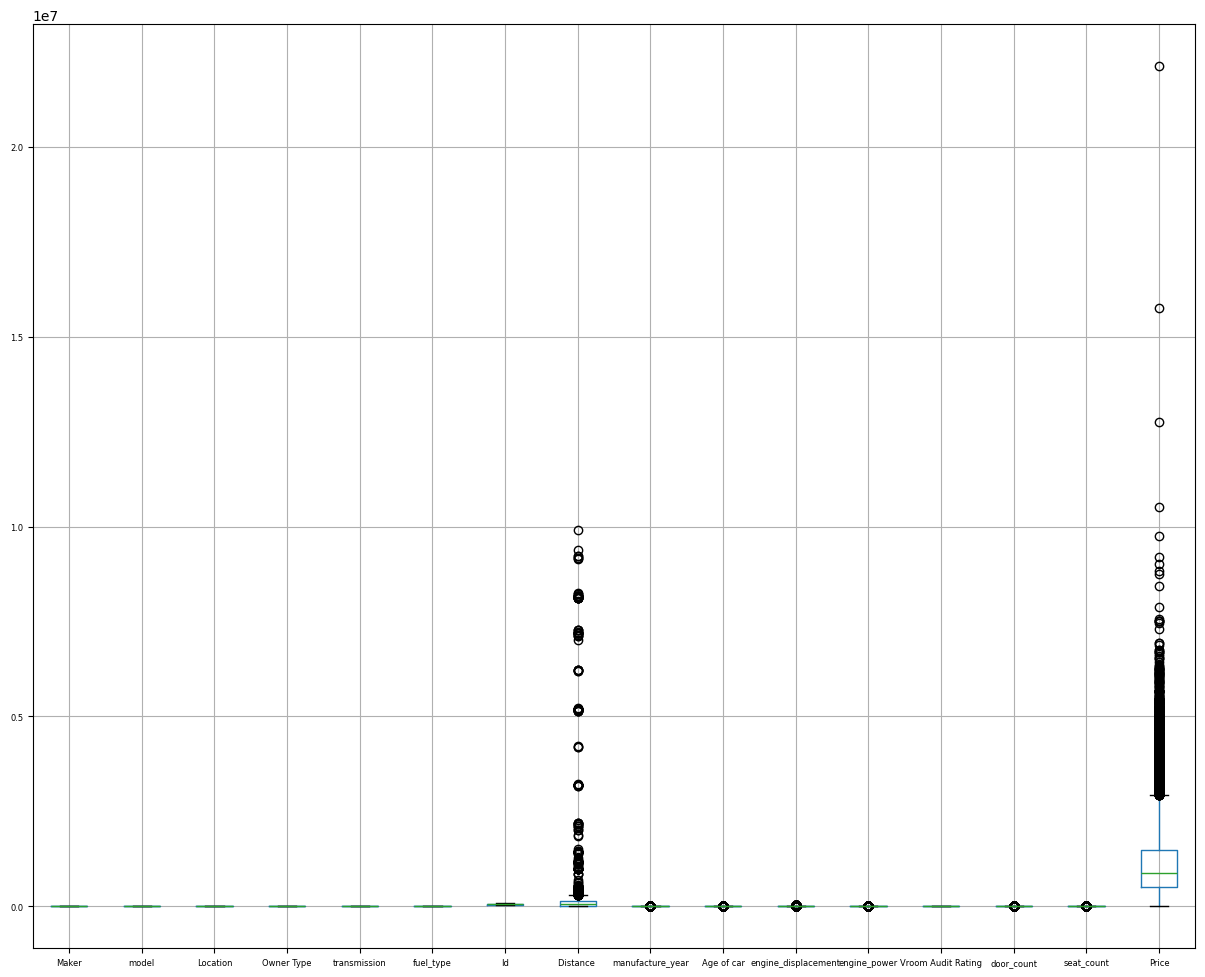

In [26]:
df.boxplot(figsize=(15,12),fontsize=6)
plt.show()

In [27]:
q1=df['Distance '].quantile(0.25)
q3=df['Distance '].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
Ul=q3+1.5*IQR

In [28]:
df['Distance ']=df['Distance '][(df['Distance ']>LL)&(df['Distance ']<Ul)]

In [29]:
q1=df['manufacture_year'].quantile(0.25)
q3=df['manufacture_year'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [30]:
df['manufacture_year']=df['manufacture_year'][(df['manufacture_year']>LL)&(df['manufacture_year']<UL)]

In [31]:
q1=df['Age of car'].quantile(0.25)
q3=df['Age of car'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [32]:
df['Age of car']=df['Age of car'][(df['Age of car']>LL)&(df['Age of car']<UL)]

In [33]:
q1=df['engine_displacement'].quantile(0.25)
q3=df['engine_displacement'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [34]:
df['engine_displacement']=df['engine_displacement'][(df['engine_displacement']>LL)&(df['engine_displacement']<UL)]

In [35]:
q1=df['engine_power'].quantile(0.25)
q3=df['engine_power'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [36]:
df['engine_power']=df['engine_power'][(df['engine_power']>LL)&(df['engine_power']<UL)]

In [37]:
import seaborn as sns

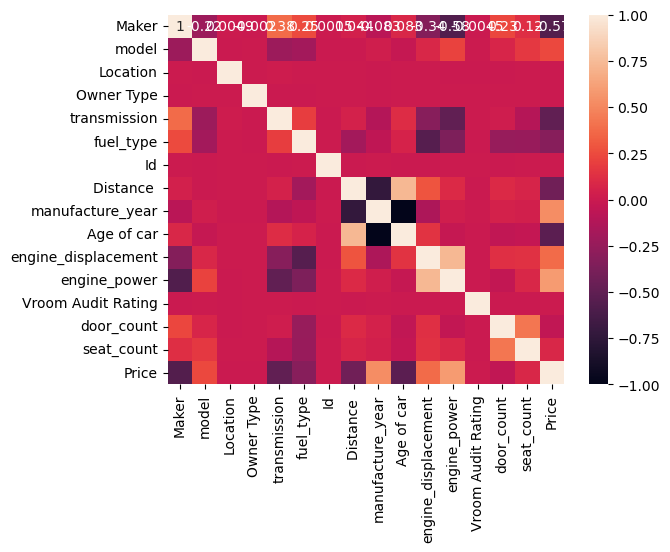

In [38]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
df_price=df[['Price']]

In [40]:
df_price

,Price
0,543764
1,401819
2,2392855
3,958606
4,3085561
...,...
53510,1342996
53511,510732
53512,2008123
53513,874352


In [41]:
df.drop(columns='Price',inplace=True)

In [42]:
df.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_stand=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

In [44]:
df_stand.isnull().sum()

Maker                     0
model                     0
Location                  0
Owner Type                0
transmission              0
fuel_type                 0
Id                        0
Distance                595
manufacture_year       1325
Age of car             1325
engine_displacement    5651
engine_power           1407
Vroom Audit Rating        0
door_count                0
seat_count                0
dtype: int64

In [45]:
df.isnull().sum()

Maker                     0
model                     0
Location                  0
Owner Type                0
transmission              0
fuel_type                 0
Id                        0
Distance                595
manufacture_year       1325
Age of car             1325
engine_displacement    5651
engine_power           1407
Vroom Audit Rating        0
door_count                0
seat_count                0
dtype: int64

In [46]:
df1=df.copy()

In [47]:
df1=pd.concat([df1,df_price],axis=1)

In [48]:
df1.dropna(subset=['Distance ','manufacture_year','Age of car','engine_displacement','engine_power','Price'],inplace=True)

In [49]:
df2=df1.copy()#data after dropping null before standization

In [50]:
df1.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
Price                  0
dtype: int64

In [51]:
df_stand=pd.DataFrame(ss.fit_transform(df1),columns=df1.columns)

In [52]:
df_stand

,Maker,model,Location,Owner Type,transmission,fuel_type,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price
0,-1.133797,-0.300574,-1.584822,1.343849,0.573606,0.990060,-1.731606,-0.663852,0.269697,-0.269697,-1.143962,-1.325530,0.003296,-0.002560,-1.840743,-0.893297
1,-1.556847,1.164285,-0.002397,1.343849,-1.743357,-1.010039,-1.731541,-0.405606,0.777839,-0.777839,0.972899,0.494926,0.707702,-0.002560,0.238918,2.054906
2,0.135355,-0.788860,1.263543,1.343849,0.573606,0.990060,-1.731476,-0.434629,0.015625,-0.015625,-0.086937,1.674851,0.707702,-0.002560,0.238918,-0.068841
3,0.558405,-0.463336,-0.951852,-1.339509,0.573606,-1.010039,-1.731347,-0.886509,1.031911,-1.031911,0.896996,0.663487,-1.405517,-0.002560,0.238918,0.797572
4,0.558405,0.838761,-0.635367,-0.445056,-1.743357,-1.010039,-1.731282,1.504706,-0.492517,0.492517,0.896996,1.169169,0.003296,1.486392,0.238918,-0.131951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45946,0.558405,-0.463336,-0.951852,-0.445056,0.573606,-1.010039,1.732381,2.661364,-1.000660,1.000660,0.986955,0.427502,1.412108,1.486392,0.238918,-0.978632
45947,0.981456,1.652571,-0.951852,1.343849,0.573606,0.990060,1.732446,-1.056527,1.031911,-1.031911,-1.829903,-1.359242,-1.405517,-0.002560,0.238918,-0.474679
45948,0.558405,-0.463336,-0.318882,-0.445056,0.573606,-1.010039,1.732511,-0.641438,0.777839,-0.777839,-0.143162,-0.449014,-1.405517,-0.002560,0.238918,0.500340
45949,0.558405,-0.463336,-1.268337,-0.445056,0.573606,-1.010039,1.732576,2.107954,-0.492517,0.492517,0.705831,-0.449014,1.412108,1.486392,0.238918,-0.732025


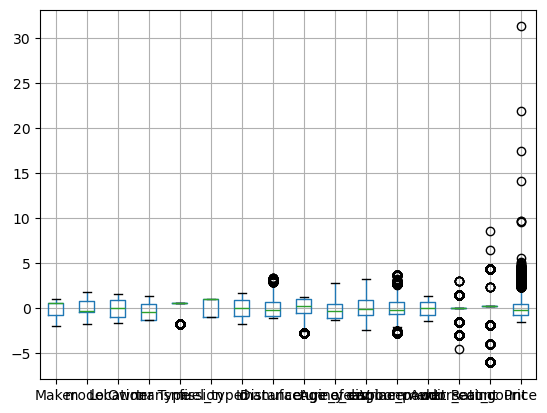

In [53]:
df_stand.boxplot()
plt.show()

In [54]:
df_stand.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
Price                  0
dtype: int64

In [55]:
df_stand_price=df_stand['Price']

In [56]:
df_stand_price

0       -0.893297
1        2.054906
2       -0.068841
3        0.797572
4       -0.131951
           ...   
45946   -0.978632
45947   -0.474679
45948    0.500340
45949   -0.732025
45950    1.485219
Name: Price, Length: 45951, dtype: float64

In [57]:
X=df_stand[['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type','Id', 'Distance ', 'manufacture_year', 'Age of car','engine_displacement', 'engine_power', 'Vroom Audit Rating','door_count', 'seat_count']]
y=df_stand['Price']

In [58]:
X.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
dtype: int64

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [60]:
y.shape

(45951,)

In [61]:
model.fit(X,y)

LinearRegression()

In [62]:
y_predicted=pd.DataFrame(model.predict(X))

In [63]:
model.score(X,y)

0.7673113114856475

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predicted)

0.23268868851435245

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_predicted)

0.3184695289615022

Train ends and Test Starts

In [66]:
df=pd.read_csv("Test_Data_Set (5).csv")

In [67]:
df.sample(10)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
1928,12929,skoda,superb,Kochi,182466.0,Second,2012,7,1968,125.0,NaN,8,auto,5.0,5.0,diesel
4071,15072,skoda,superb,Kolkata,31790.0,First,2015,4,1968,103.0,NaN,5,man,4.0,5.0,diesel
1655,12656,toyota,avensis,Pune,31600.0,Fourth & Above,2011,8,1598,97.0,NaN,4,man,4.0,5.0,petrol
2376,13377,toyota,aygo,Hyderabad,4739.0,Fourth & Above,2014,5,998,50.0,NaN,4,man,NaN,NaN,petrol
4502,15503,toyota,yaris,Chennai,98000.0,First,2005,14,998,48.0,NaN,8,man,2.0,5.0,petrol
395,11396,skoda,octavia,Coimbatore,53000.0,Second,2011,8,1798,118.0,NaN,6,auto,4.0,5.0,petrol
3556,14557,skoda,rapid,Kochi,4961.0,Fourth & Above,2014,5,1598,66.0,NaN,5,man,5.0,5.0,diesel
4847,15848,skoda,octavia,Bangalore,135500.0,Third,2011,8,1968,103.0,NaN,8,auto,5.0,NaN,diesel
1626,12627,skoda,yeti,Jaipur,67105.0,Fourth & Above,2013,6,1968,103.0,NaN,8,man,5.0,5.0,diesel
5315,16316,audi,q3,Mumbai,119000.0,First,2013,6,1968,103.0,NaN,6,man,4.0,5.0,diesel


In [68]:

df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

In [69]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count              806
seat_count              891
fuel_type                 0
dtype: int64

In [70]:
df.shape

(5615, 16)

In [71]:
df.drop(columns='body_type',inplace=True)

In [72]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)

In [73]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [74]:
df['door_count'].fillna(df['door_count'].mode()[0],inplace=True)

In [75]:
df['seat_count'].fillna(df['seat_count'].mode()[0],inplace=True)

In [76]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [77]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
dtype: object

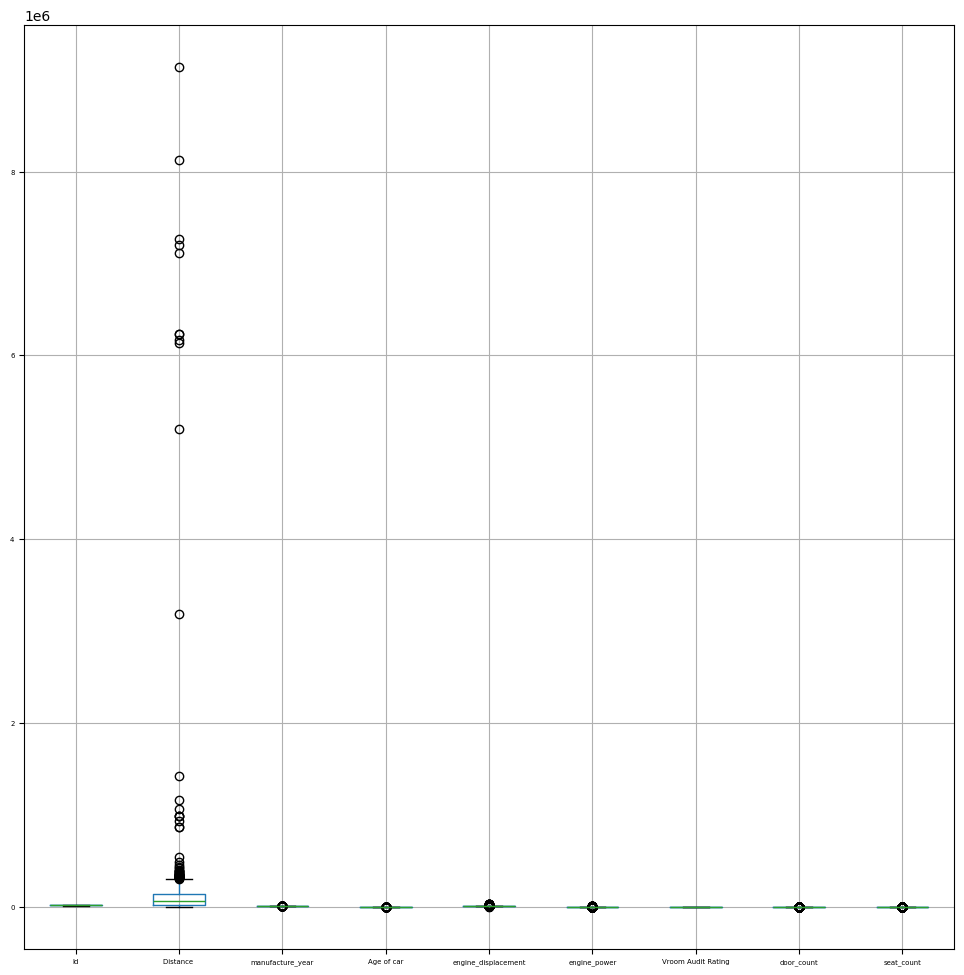

In [78]:
df.boxplot(figsize=(12,12),fontsize=5)
plt.show()

In [79]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
dtype: object

In [80]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(exclude='object')

In [81]:
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [82]:
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [83]:
df_num=df_num.astype(int)

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [85]:
df_cat['Location']=le.fit_transform(df_cat['Location'])

In [86]:
df_cat['Maker']=le.fit_transform(df_cat['Maker'])
df_cat['Owner Type']=le.fit_transform(df_cat['Owner Type'])
df_cat['fuel_type']=le.fit_transform(df_cat['fuel_type'])
df_cat['model']=le.fit_transform(df_cat['model'])
df_cat['transmission']=le.fit_transform(df_cat['transmission'])

In [87]:
df_cat.dtypes

Maker           int32
model           int32
Location        int32
Owner Type      int32
transmission    int32
fuel_type       int32
dtype: object

In [88]:
df=pd.concat([df_cat,df_num],axis=1)

In [89]:
df.dtypes

Maker                  int32
model                  int32
Location               int32
Owner Type             int32
transmission           int32
fuel_type              int32
Id                     int32
Distance               int32
manufacture_year       int32
Age of car             int32
engine_displacement    int32
engine_power           int32
Vroom Audit Rating     int32
door_count             int32
seat_count             int32
dtype: object

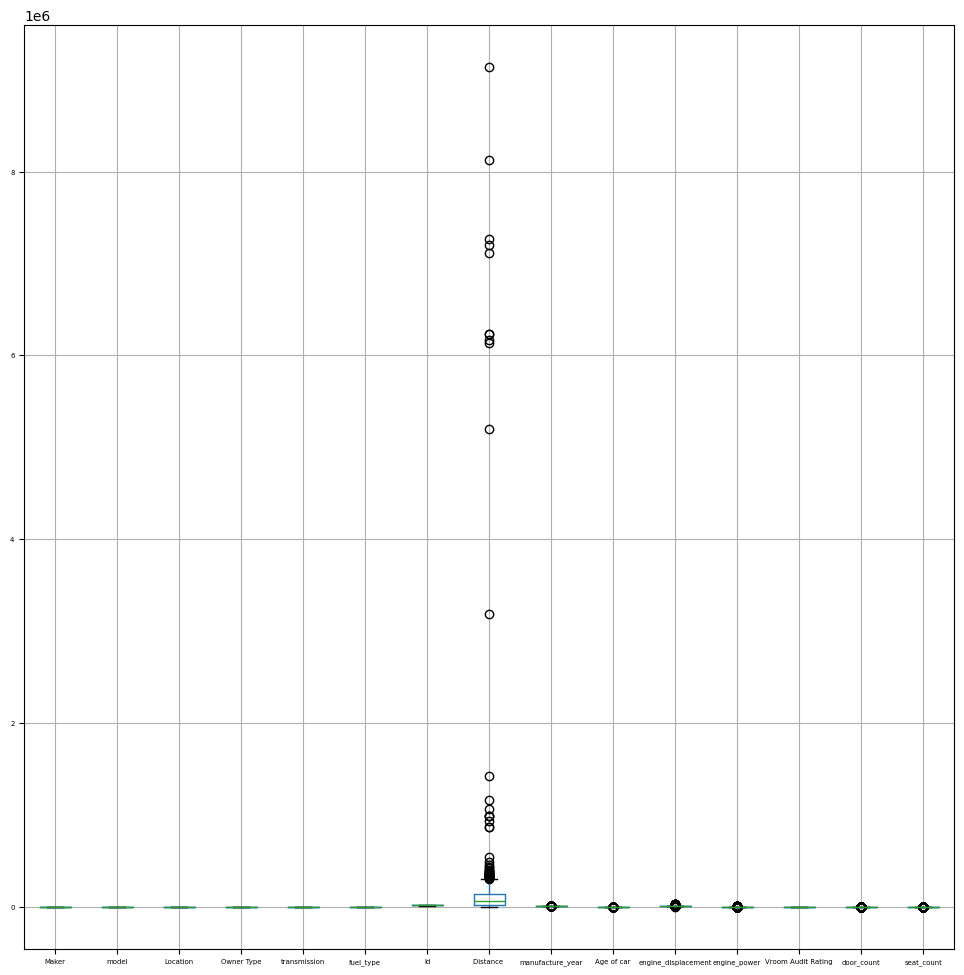

In [90]:
df.boxplot(figsize=(12,12),fontsize=5)
plt.show()

In [91]:
q1=df['Distance '].quantile(0.25)
q3=df['Distance '].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [92]:
df['Distance ']=df['Distance '][(df['Distance ']>LL)&(df['Distance ']<UL)]

In [93]:
q1=df['manufacture_year'].quantile(0.25)
q3=df['manufacture_year'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [94]:
df['manufacture_year']=df['manufacture_year'][(df['manufacture_year']>LL)&(df['manufacture_year']<UL)]

In [95]:
q1=df['Age of car'].quantile(0.25)
q3=df['Age of car'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [96]:
df['Age of car']=df['Age of car'][(df['Age of car']>LL)&(df['Age of car']<UL)]

In [97]:
q1=df['engine_power'].quantile(0.25)
q3=df['engine_power'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [98]:
df['engine_power']=df['engine_power'][(df['engine_power']>LL)&(df['engine_power']<UL)]

In [99]:
q1=df['engine_displacement'].quantile(0.25)
q3=df['engine_displacement'].quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR

In [100]:
df['engine_displacement']=df['engine_displacement'][(df['engine_displacement']>LL)&(df['engine_displacement']<UL)]

In [101]:
df.isnull().sum()

Maker                    0
model                    0
Location                 0
Owner Type               0
transmission             0
fuel_type                0
Id                       0
Distance                63
manufacture_year       145
Age of car             145
engine_displacement    540
engine_power           174
Vroom Audit Rating       0
door_count               0
seat_count               0
dtype: int64

In [102]:
df.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count'],
      dtype='object')

In [103]:
df.dropna(subset=['Distance ','manufacture_year','Age of car','engine_displacement','engine_power'],inplace=True)

In [104]:
df_stand_test=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

In [105]:
df_stand_test

,Maker,model,Location,Owner Type,transmission,fuel_type,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count
0,0.554139,-0.451610,1.270974,-1.297423,0.572993,0.991597,-1.729595,1.084429,-1.003979,1.003979,-0.143393,-0.507302,-0.708530,-0.012982,0.240088
1,0.554139,0.529773,-0.626117,1.350650,0.572993,-1.008474,-1.728977,-0.627037,0.749106,-0.749106,-0.134924,-0.438767,-1.425620,-0.012982,0.240088
2,0.554139,-0.451610,-0.626117,0.467959,0.572993,-1.008474,-1.728360,-0.610195,0.749106,-0.749106,0.909598,0.692069,-0.708530,1.525582,0.240088
3,-2.004518,-0.124482,-0.309935,-0.414732,-1.745221,-1.008474,-1.727742,-0.921106,0.999547,-0.999547,0.909598,0.692069,1.442739,-0.012982,0.240088
4,-2.004518,1.020465,-0.942299,1.350650,-1.745221,0.991597,-1.727124,-0.953030,0.999547,-0.999547,0.954767,2.713866,-1.425620,-3.090110,0.240088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,-2.004518,-1.105865,0.322429,0.467959,0.572993,-1.008474,1.733616,-0.852293,0.999547,-0.999547,0.909598,1.548763,-0.708530,-3.090110,-4.017526
4855,0.554139,-0.451610,1.270974,-1.297423,0.572993,-1.008474,1.734851,1.084088,-0.002216,0.002216,0.909598,0.452195,1.442739,-0.012982,0.240088
4856,0.554139,-0.451610,-1.258481,0.467959,0.572993,-1.008474,1.736086,2.230854,-1.504861,1.504861,0.706340,-0.438767,0.725649,1.525582,0.240088
4857,0.127696,0.366209,0.322429,1.350650,0.572993,0.991597,1.736704,-0.143155,-0.002216,0.002216,0.991466,0.486462,-0.708530,-0.012982,4.497702


In [138]:
y_predicted_test=pd.DataFrame(model.predict(df_stand_test))

In [139]:
y_predicted_test

,0
0,-1.126427
1,0.228381
2,0.539639
3,1.715611
4,2.164459
...,...
4854,1.524719
4855,-0.172541
4856,-1.294374
4857,0.208978


In [108]:
df.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count'],
      dtype='object')

In [109]:
id=df['Id']
type(id)

pandas.core.series.Series

In [110]:
id.isnull().sum()

0

In [111]:
id=pd.DataFrame(id)

In [112]:
type(y_predicted_test)

pandas.core.frame.DataFrame

In [113]:
final=pd.concat([id,y_predicted_test],axis=1,ignore_index=False)

In [114]:
final.shape

(5516, 2)

In [119]:
final.isnull().sum()

Id    657
0     657
dtype: int64

In [116]:
y_predicted_test.isnull().sum()

0    0
dtype: int64

In [117]:
id.isnull().sum()

Id    0
dtype: int64

In [118]:
df.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
dtype: int64

In [121]:
id.index


Index([   0,    1,    2,    3,    4,    5,    7,    8,    9,   11,
       ...
       5603, 5604, 5605, 5606, 5607, 5608, 5610, 5612, 5613, 5614],
      dtype='int64', length=4859)

In [123]:
y_predicted_test.index


RangeIndex(start=0, stop=4859, step=1)

In [140]:
id.reset_index(drop=True,inplace=True)

In [141]:
y_predicted_test.reset_index(drop=True,inplace=True)

In [142]:
final=pd.concat([id,y_predicted_test],axis=1,ignore_index=False)

In [134]:
final.isnull().sum()

Id    0
0     0
dtype: int64

In [145]:
final.rename(columns={0:'y_predicted'},inplace=True)

In [146]:
final.to_csv("project_final_data")